In [7]:
 #This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize 

plt.rcParams['figure.figsize'] = (13, 7)

In [10]:
#take a look on the dataset
df = pd.read_csv("/Users/ulfaoctaviani/Documents/UAL/Personalisation/ContentBasedFilteringMovie/netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
#showing info for each featrue
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Data Visualisation

In [12]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."


Is movies or TV shows bigger?

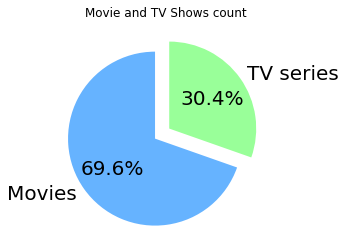

<Figure size 432x288 with 0 Axes>

In [13]:
def pie_chart(df, column ,explode , labels,title,no):
    
    plt.pie(df[column].value_counts(),
            explode=explode,    #explode=[0.04,0]
            startangle=90, 
            autopct='%1.1f%%',
            labels=labels, #labels=['Males','Females']
            colors = ['#66b3ff','#99ff99'],
            pctdistance=.6,
            textprops={'fontsize': 20})
    plt.title(title)
    plt.figure(no)

pie_chart(df, "type" ,[0.15,0.05], ['Movies',"TV series"],"Movie and TV Shows count",0)

Top 10 Directors

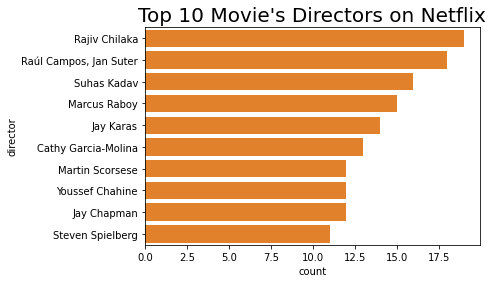

In [14]:
Top10_movies_directors = df[df['type'] == 'Movie']

base_color = sns.color_palette()[1]

sns.countplot(y = 'director',color= base_color, data = Top10_movies_directors, order = Top10_movies_directors.director.value_counts().head(10).index)

plt.title("Top 10 Movie's Directors on Netflix", fontsize = 20);

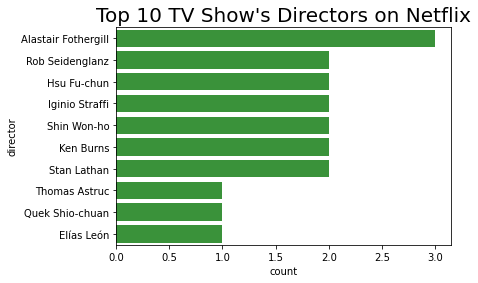

In [15]:
Top10_Series_directors = df[df['type'] == 'TV Show']

base_color = sns.color_palette()[2]

sns.countplot(y = 'director',color= base_color, data = Top10_Series_directors, order = Top10_Series_directors.director.value_counts().head(10).index)

plt.title("Top 10 TV Show's Directors on Netflix", fontsize = 20);

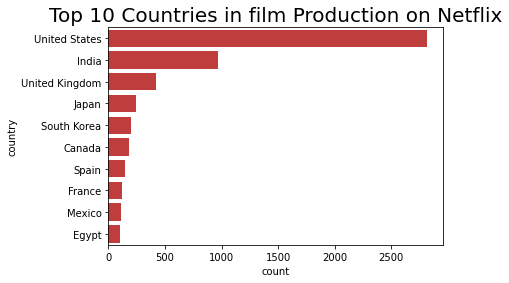

In [16]:
base_color = sns.color_palette()[3]

sns.countplot(y = 'country',color= base_color, data = df, order = df.country.value_counts().head(10).index)

plt.title("Top 10 Countries in film Production on Netflix", fontsize = 20);

Data Cleanup

In [17]:
#now checking the NaN values
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

As cast and country are important features when calculating the similarity between movies, i won't be able to fill them with a good information so, i will drop NaNs of them

For director, if i dropped NaNs it will be a big loss of data so, i will fill it with Unknown

In [18]:
df= df.dropna(subset=['cast','country'], axis = 0)
df['director'] = df['director'].fillna("Unknown")
df = df.reset_index( drop=True)

Feature Engineering

In [19]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


Using Cosine Similarity to calculate the closeness of vector into multidimensional space.

Cosine similarity is the measure of similarity between two vectors, by computing the cosine of the angle between two vectors projected into multidimensional space. It can be applied to items available on a dataset to compute similarity to one another via keywords or other metrics. Similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value as shown in the equation below. We can simply say that the CS score of two vectors increases as the angle between them decreases.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7305 entries, 0 to 7304
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7305 non-null   object
 1   type          7305 non-null   object
 2   title         7305 non-null   object
 3   director      7305 non-null   object
 4   cast          7305 non-null   object
 5   country       7305 non-null   object
 6   date_added    7296 non-null   object
 7   release_year  7305 non-null   int64 
 8   rating        7302 non-null   object
 9   duration      7302 non-null   object
 10  listed_in     7305 non-null   object
 11  description   7305 non-null   object
dtypes: int64(1), object(11)
memory usage: 685.0+ KB


In [21]:
overall_infos = []
for i in range(0, df.shape[0]):
    overall_infos.append(df['type'][i]+' '+df['title'][i]+' '+df['director'][i]+' '+df['cast'][i]+' '+df['description'][i]+' '+df['country'][i])
df['overall_infos'] = overall_infos

when trying to use specific movie we have to use id, the one provided with the dataset have a lot of missing ids but at the same time they aren't NaN values,

In [22]:
df.iloc[4505:4509]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
4505,s5560,Movie,Felipe Neto: My Life Makes No Sense,Diego Pignataro,Felipe Neto,Brazil,"March 24, 2017",2017,TV-MA,91 min,Stand-Up Comedy,YouTube sensation Felipe Neto brings the stori...,Movie Felipe Neto: My Life Makes No Sense Dieg...
4506,s5561,Movie,The C Word,Meghan O'Hara,Morgan Freeman,United States,"March 24, 2017",2016,TV-14,93 min,Documentaries,"To solve the mystery of cancer, challenging th...",Movie The C Word Meghan O'Hara Morgan Freeman ...
4507,s5562,Movie,The Most Hated Woman in America,Tommy O'Haver,"Melissa Leo, Josh Lucas, Vincent Kartheiser, J...",United States,"March 24, 2017",2017,TV-MA,93 min,Dramas,This drama follows the controversial life of o...,Movie The Most Hated Woman in America Tommy O'...
4508,s5563,TV Show,Dave Chappelle,Stan Lathan,Dave Chappelle,United States,"March 21, 2017",2017,TV-MA,1 Season,"Stand-Up Comedy & Talk Shows, TV Comedies",Comedy icon Dave Chappelle makes his triumphan...,TV Show Dave Chappelle Stan Lathan Dave Chappe...


Create own id

In [23]:
df.insert(1, "id", list(range(1,7306)), True)

see feature we will use

In [24]:
df_new = df[['id','overall_infos']]
df_new.head(1)

,id,overall_infos
0,1,"TV Show Blood & Water Unknown Ama Qamata, Khos..."


Text preprosessing

Before calculating similarity, a text preprocessing is need to be applied on the new feature, to make it easier for the cosine similarity algorithm when deal with each row after transforming them into vectors

In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:997)>


False

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [25]:
def text_preprocessing(column):
    #make all words with lower letters
    column = column.str.lower()
    #getting rid of any punctution
    column = column.str.replace('http\S+|www.\S+|@|%|:|,|', '', case=False)
    #spliting each sentence to words to apply previous funtions on them 
    word_tokens = column.str.split()
    keywords = word_tokens.apply(lambda x: [item for item in x if item not in stop])
    #assemble words of each sentence again and assign them in new column
    for i in range(len(keywords)):
        keywords[i] = " ".join(keywords[i])
        column = keywords

    return column

In [26]:
df_new['cleaned_infos'] = text_preprocessing(df_new['overall_infos'])

/var/folders/_l/yj9wgfq114b02wl670d3npmr0000gn/T/ipykernel_30882/3812408918.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  column = column.str.replace('http\S+|www.\S+|@|%|:|,|', '', case=False)
/var/folders/_l/yj9wgfq114b02wl670d3npmr0000gn/T/ipykernel_30882/3077776638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cleaned_infos'] = text_preprocessing(df_new['overall_infos'])


see the difference between before and after preprocessing

In [27]:
df['overall_infos'][6]

'TV Show Dear White People Unknown Logan Browning, Brandon P. Bell, DeRon Horton, Antoinette Robertson, John Patrick Amedori, Ashley Blaine Featherson, Marque Richardson, Giancarlo Esposito Students of color navigate the daily slights and slippery politics of life at an Ivy League college that\'s not nearly as "post-racial" as it thinks. United States'

In [28]:
df_new['cleaned_infos'][6]

'tv show dear white people unknown logan browning brandon p. bell deron horton antoinette robertson john patrick amedori ashley blaine featherson marque richardson giancarlo esposito students color navigate daily slights slippery politics life ivy league college that\'s nearly "post-racial" thinks. united states'

To apply Cosine similarity we need to transform each sentence into vector, CountVectorizer will do this for us and combine them all in one matrix

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

CV = CountVectorizer()
converted_metrix = CV.fit_transform(df_new['cleaned_infos'])

In [30]:
cosine_similarity = cosine_similarity(converted_metrix)

see the matrix

In [31]:
cosine_similarity

array([[1.        , 0.05856516, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.05856516, 1.        , 0.        , ..., 0.02678358, 0.04938648,
        0.07919455],
       [0.        , 0.        , 1.        , ..., 0.10006256, 0.09225312,
        0.04931137],
       ...,
       [0.        , 0.02678358, 0.10006256, ..., 1.        , 0.10846523,
        0.02898855],
       [0.        , 0.04938648, 0.09225312, ..., 0.10846523, 1.        ,
        0.02672612],
       [0.        , 0.07919455, 0.04931137, ..., 0.02898855, 0.02672612,
        1.        ]])

Testing

In [32]:
#finding the correct name of a movie
df[df['title'].str.contains('Ninja')]

,show_id,id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,overall_infos
39,s64,40,Movie,Naruto the Movie: Ninja Clash in the Land of Snow,Tensai Okamura,"Junko Takeuchi, Noriaki Sugiyama, Chie Nakamur...",Japan,"September 15, 2021",2004,TV-PG,83 min,"Action & Adventure, Anime Features, Internatio...","Naruto, Sasuke and Sakura learn they'll be pro...",Movie Naruto the Movie: Ninja Clash in the Lan...
512,s803,513,Movie,Ninja Assassin,James McTeigue,"Rain, Naomie Harris, Ben Miles, Rick Yune, Shô...","Germany, United States, France","June 2, 2021",2009,R,99 min,Action & Adventure,A former assassin must protect himself and a E...,"Movie Ninja Assassin James McTeigue Rain, Naom..."
926,s1351,927,TV Show,Power Rangers Ninja Steel,Unknown,"William Shewfelt, Nico Greetham, Zoe Robins, P...",United States,"February 3, 2021",2018,TV-Y7,2 Seasons,Kids' TV,A new generation of teen heroes uses superhuma...,TV Show Power Rangers Ninja Steel Unknown Will...
929,s1354,930,Movie,Beverly Hills Ninja,Dennis Dugan,"Chris Farley, Nicollette Sheridan, Robin Shou,...",United States,"February 1, 2021",1997,PG-13,89 min,"Action & Adventure, Comedies","Raised by ninjas, a big-hearted but bumbling o...",Movie Beverly Hills Ninja Dennis Dugan Chris F...
965,s1396,966,TV Show,Hello Ninja,Unknown,"Lukas Engel, Zoey Siewert, Sam Vincent, Mayumi...",United States,"January 19, 2021",2021,TV-Y,4 Seasons,Kids' TV,BFFs Wesley and Georgie and their silly cat si...,"TV Show Hello Ninja Unknown Lukas Engel, Zoey ..."
1276,s1759,1277,TV Show,LEGO Ninjago,Unknown,"Michael Adamthwaite, Paul Dobson, Kelly Metzge...",Canada,"November 1, 2020",2020,TV-Y7,2 Seasons,Kids' TV,While fighting foes across Ninjago City and be...,TV Show LEGO Ninjago Unknown Michael Adamthwai...
1277,s1760,1278,TV Show,LEGO Ninjago: Masters of Spinjitzu,Unknown,"Vincent Tong, Jillian Michaels, Ian James Corl...","Denmark, Singapore, Canada, United States","November 1, 2020",2019,TV-Y7,10 Seasons,Kids' TV,"Kai, Jay, Cole and Zane must master their elem...",TV Show LEGO Ninjago: Masters of Spinjitzu Unk...
5553,s6766,5554,Movie,Five Elements Ninjas,Cheh Chang,"Tien-chi Cheng, Tien Hsiang Lung, Meng Lo, Mic...",Hong Kong,"September 17, 2019",1982,R,104 min,"Action & Adventure, International Movies",When five ninjas whose fighting styles are bas...,Movie Five Elements Ninjas Cheh Chang Tien-chi...
6253,s7589,6254,TV Show,Ninja Hattori,Unknown,"Junko Hori, Masako Sugaya, Yuko Mita, Kaneta K...",Japan,"December 23, 2018",1981,TV-Y7,1 Season,"Anime Series, Kids' TV",Elementary school student Kenichi Mitsuba's ho...,"TV Show Ninja Hattori Unknown Junko Hori, Masa..."
6254,s7590,6255,TV Show,Ninja Turtles: The Next Mutation,Unknown,"Jarred Blancard, Mitchell A. Lee Yuen, Dean Ch...","Canada, United States","January 1, 2016",1997,TV-G,1 Season,"Kids' TV, TV Comedies",Everyone's favorite teenage mutants are back i...,TV Show Ninja Turtles: The Next Mutation Unkno...


In [33]:
#this how we will get the id of the movie so we can check similarity between it and other movies
title = 'Teenage Mutant Ninja Turtles'

movie_id = df[df['title'] == title]['id'].values[0]

In [34]:
score = list(enumerate(cosine_similarity[movie_id]))

In [35]:
#now sort the similar movies in descending order
sorted_score = sorted(score, key=lambda x:x[1], reverse= True)
#we will ignore the first score because it will give us a 100% score because it's the same movie 
sorted_score = sorted_score[1:]

In [36]:
sorted_score[0:10]

[(6757, 0.33333333333333337),
 (3136, 0.1986798535597566),
 (6254, 0.1986798535597566),
 (4483, 0.19529164171612678),
 (3947, 0.18848425873126295),
 (5912, 0.18848425873126295),
 (4840, 0.1861714808514273),
 (5914, 0.1861714808514273),
 (1217, 0.18394180184548975),
 (2324, 0.18179036173052482)]

In [37]:
#now showing the top 5 movies similar to TMNT accroding to this algorithm
i = 0
for item in sorted_score:
    movie_title = df[df['id'] == item[0]]['title'].values[0]
    print(i+1,movie_title)
    i = i+1
    if i > 4:
        break

1 Teenage Cocktail
2 Jagat
3 Ninja Hattori
4 Macho
5 Psychokinesis


Try make your own recommendation (horror, etc)